<a href="https://colab.research.google.com/github/ferhatSF/Tensorflow-Studies/blob/master/Gradient_Descent_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Descent Optimizer

TensorFlow 1.x Lazy Execution Model

Python 3.x

Numpy


by Ferhat Hatay

#GITHUB clone from public repository
https://github.com/ferhatSF/Tensorflow-Studies

In [1]:
github_user="ferhatSF"
github_repository="TensorFlow-Studies"
!rm -rf {github_repository}
!git clone https://github.com/{github_user}/{github_repository}.git

Cloning into 'TensorFlow-Studies'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 55 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [2]:
import os
import sys

from inspect import getsourcefile
from os.path import abspath

CURRENT_DIR = os.path.dirname(abspath(getsourcefile(lambda:0)))
PARENT_DIR  = os.path.join   (CURRENT_DIR,github_repository)
INCLUDE_DIR = os.path.join   (PARENT_DIR,"INCLUDE")
OUTPUT_DIR  = os.path.join   (PARENT_DIR,"OUTPUT")
sys.path.append(INCLUDE_DIR)
sys.path.append(PARENT_DIR)

print()
print("==========================================================")
print("CURRENT DIR: ",CURRENT_DIR)
print("PARENT  DIR: ",PARENT_DIR)
print("INCLUDE DIR: ",INCLUDE_DIR)
print("OUTPUT  DIR: ",OUTPUT_DIR)
print("==========================================================")
print()

/content

CURRENT DIR:  /content
PARENT  DIR:  /content/TensorFlow-Studies
INCLUDE DIR:  /content/TensorFlow-Studies/INCLUDE
OUTPUT  DIR:  /content/TensorFlow-Studies/OUTPUT



#SETUP

imports and
function definitions

In [16]:
import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

import numpy as np
import matplotlib.pyplot as plt

from generate_dataset import generate_dataset
from plot_data        import plot_data
from plot_convergence import plot_convergence

TensorFlow version: 1.13.1
Eager execution: False


In [0]:
def linear_regression( W_actual, b_actual, BullsEyeGuess):
    
    x = tf.placeholder(tf.float32, [None,], name="x")
    y = tf.placeholder(tf.float32, [None,], name="y")

    if BullsEyeGuess:
        W      = tf.Variable   (W_actual, name='W')
        b      = tf.Variable   (b_actual, name='b')
    else:
        W      = tf.Variable   (np.random.normal(), name='W')
        b      = tf.Variable   (np.random.normal(), name='b')
        
    y_pred = tf.add        (tf.multiply(W, x), b)
    loss   = tf.reduce_mean(tf.square(y_pred - y))

    return (x,y,y_pred,loss,W,b)

In [0]:
def optimize (x_batch, y_batch, 
              W_actual, b_actual, BullsEyeGuess,
              iterations=10, 
              learn_rate=0.1,):
    
    x, y, y_pred, loss, W, b = linear_regression(W_actual, 
                                                 b_actual,
                                                 BullsEyeGuess)
    
    loss_history = []
    W_history    = []
    b_history    = []
    
    optimizer = tf.train.GradientDescentOptimizer(learn_rate)
    train_op  = optimizer.minimize(loss)

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        feed_dict = {x: x_batch, y: y_batch}
            
        for i in range(iterations):
            session.run(train_op, feed_dict)
            loss_history.append(loss.eval(feed_dict))
            W_history.append(session.run(W))
            b_history.append(session.run(b))
            
        y_pred_batch = session.run(y_pred, {x : x_batch})

    return(y_pred_batch, loss_history, W_history, b_history)

#SETUP THE DATA

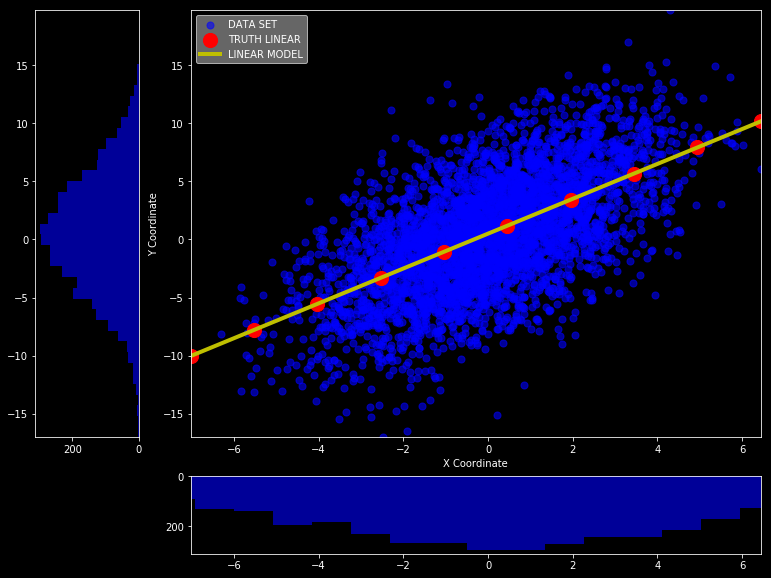

In [17]:
W_actual = 1.5 #@param {type:"slider", min:0, max:10, step:0.1}
b_actual = 0.5 #@param {type:"slider", min:0, max:10, step:0.1}

npoints  = 4000 #@param {type:"slider", min:0, max:10000, step:100}
x_start  = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
x_range  = 2 #@param {type:"slider", min:0.1, max:10, step:0.1}
x_random = True #@param {type:"boolean"}

noise_amplitude = 4 #@param {type:"slider", min:0, max:10, step:0.1}

x_data, y_data, x_true, y_true = generate_dataset(
    npoints         = npoints, 
    x_random        = x_random,
    x_start         = x_start,
    x_range         = x_range, 
    noise_amplitude = noise_amplitude)

plot_data(x_data, y_data, [], x_true, y_true)

#OPTIMIZE

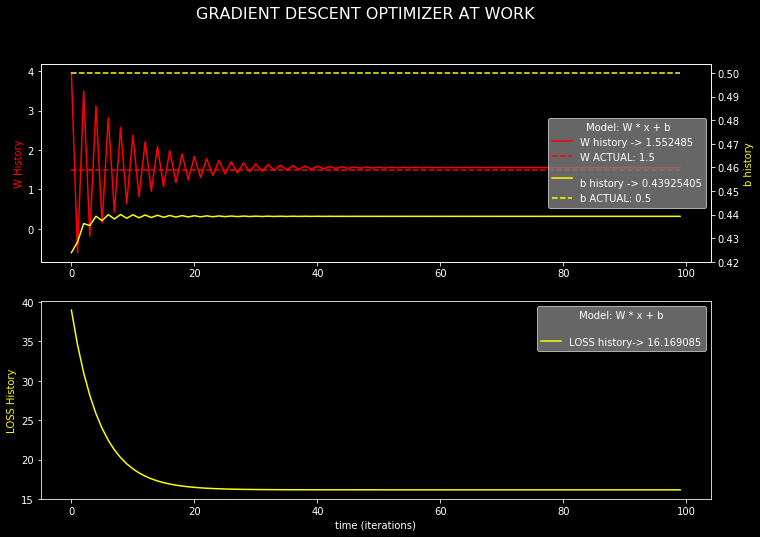

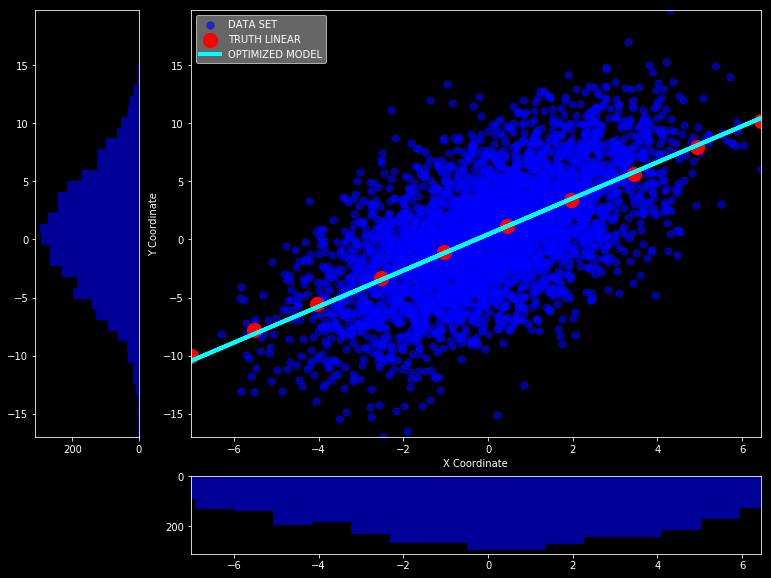

In [18]:
BullsEyeGuess = False #@param {type:"boolean"}
learn_rate    = 0.24  #@param {type:"slider", min:0, max:1, step:0.01}
iterations    = 100  #@param {type:"slider", min:10, max:10000, step:10}

y_pred_batch, loss_history, W_history, b_history = optimize( 
                                 x_data, y_data,
                                 W_actual, b_actual, BullsEyeGuess,
                                 iterations=iterations,
                                 learn_rate=learn_rate)

plot_convergence(loss_history, W_history, b_history,  W_actual, b_actual)
plot_data(x_data, y_data, y_pred_batch, x_true, y_true)